In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load Dataset
data = pd.read_csv('Dataset/wine.csv')
L = data.iloc[:, -1]
L = list(L)
L = np.asarray(list(L))
X = data.iloc[:, 1:-1]
columns = list(X.columns)
# Split Into Training & Test
X_train, X_test, L_train, L_test = train_test_split(X, L, test_size=0.3)

# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
compare_list = []
for i in range(2, 12):
    print('Testing Result for', i, 'Features')
    sfs1 = SFS(knn,
            k_features=i,
            forward=True,
            scoring='accuracy',
            cv=5)
    sfs1 = sfs1.fit(X_train, L_train)
    result = sfs1.subsets_
    compare_list.append((i,
                         list(result.items())[-1][1]['avg_score'],
                         list(result.items())[-1][1]['feature_names']))


Testing Result for 2 Features
Testing Result for 3 Features
Testing Result for 4 Features
Testing Result for 5 Features
Testing Result for 6 Features
Testing Result for 7 Features
Testing Result for 8 Features
Testing Result for 9 Features
Testing Result for 10 Features
Testing Result for 11 Features


best result meets on: (7, 0.9931822193208332, ('2', '3', '5', '6', '7', '8', '9'))


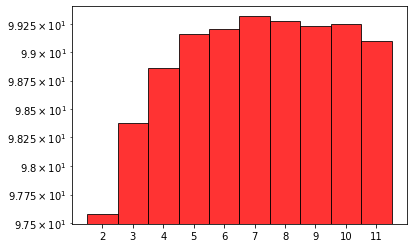

In [3]:
from matplotlib import pyplot as plt
sorted_list = sorted(compare_list, key=lambda x: x[1], reverse=True)
print('best result meets on:', sorted_list[0])

fig, ax = plt.subplots()
ax.bar([i[0] for i in sorted_list],
       [i[1]*100 for i in sorted_list],
       width=1,
       color='r',
       align='center',
       alpha=0.8,
       edgecolor='black')
ax.set_yscale('log')
# plt.grid(True)
_ = plt.xticks(np.arange(2, 12))
plt.show()
